In [1]:
import pandas as pd
df = pd.read_csv('cell_meta_data.csv', index_col=[0, 1])
df

nCount_RNA  nFeature_RNA  percent.mt  \
cell_id               TCR_entry_number                                         
AAACGGGAGGTTACCT-KH_1 NaN                   1150.0           734   12.347826   
AAACGGGGTCCGTGAC-KH_1 1.0                   4552.0          1526    2.789982   
                      2.0                   4552.0          1526    2.789982   
AAAGCAAAGAAGGCCT-KH_1 NaN                   3543.0          1246    4.318374   
AAAGCAACACGAAACG-KH_1 NaN                   1289.0           863   10.240497   
...                                            ...           ...         ...   
TTTGGTTCATCCGGGT-YY79 2.0                   4550.0          1429    4.747253   
TTTGGTTCATGCCTAA-YY79 NaN                   3585.0          1887    5.216179   
TTTGGTTCATTGGTAC-YY79 1.0                   6561.0          1845    4.389575   
TTTGGTTGTGTGGCTC-YY79 1.0                  21609.0          4769    4.336156   
                      2.0                  21609.0          4769    4.336156   

                                       predicted.celltype.l2 LibraryName  \
cell_id               TCR_entry_number                                     
AAACGGGAGGTTACCT-KH_1 NaN                            CD4 TCM        KH_1   
AAACGGGGTCCGTGAC-KH_1 1.0                            CD4 TCM        KH_1   
                      2.0                            CD4 TCM        KH_1   
AAAGCAAAGAAGGCCT-KH_1 NaN                            CD4 TCM        KH_1   
AAAGCAACACGAAACG-KH_1 NaN                          CD4 Naive        KH_1   
...                                                      ...         ...   
TTTGGTTCATCCGGGT-YY79 2.0                          CD8 Naive        YY79   
TTTGGTTCATGCCTAA-YY79 NaN                            CD8 TEM        YY79   
TTTGGTTCATTGGTAC-YY79 1.0                          CD8 Naive        YY79   
TTTGGTTGTGTGGCTC-YY79 1.0                  CD4 Proliferating        YY79   
                      2.0                  CD4 Proliferating        YY79   

                                        PFS_6M  Timepoint  CD8Lowery_neg_99g  \
cell_id               TCR_entry_number                                         
AAACGGGAGGTTACCT-KH_1 NaN                    0          0           0.111052   
AAACGGGGTCCGTGAC-KH_1 1.0                    0          0           0.619826   
                      2.0                    0          0           0.619826   
AAAGCAAAGAAGGCCT-KH_1 NaN                    0          0           0.562210   
AAAGCAACACGAAACG-KH_1 NaN                    0          0           0.175342   
...                                        ...        ...                ...   
TTTGGTTCATCCGGGT-YY79 2.0                    1          2           0.550197   
TTTGGTTCATGCCTAA-YY79 NaN                    1          2           0.434090   
TTTGGTTCATTGGTAC-YY79 1.0                    1          2           0.640784   
TTTGGTTGTGTGGCTC-YY79 1.0                    1          2           0.645955   
                      2.0                    1          2           0.645955   

                                        CD8Lowery_pos_243g  \
cell_id               TCR_entry_number                       
AAACGGGAGGTTACCT-KH_1 NaN                        -0.128690   
AAACGGGGTCCGTGAC-KH_1 1.0                        -0.052084   
                      2.0                        -0.052084   
AAAGCAAAGAAGGCCT-KH_1 NaN                        -0.054794   
AAAGCAACACGAAACG-KH_1 NaN                        -0.127262   
...                                                    ...   
TTTGGTTCATCCGGGT-YY79 2.0                        -0.055380   
TTTGGTTCATGCCTAA-YY79 NaN                         0.044218   
TTTGGTTCATTGGTAC-YY79 1.0                         0.044553   
TTTGGTTGTGTGGCTC-YY79 1.0                         0.321061   
                      2.0                         0.321061   

                                        CD8Oliveira_TTE_100g  ...  \
cell_id               TCR_entry_number                        ...   
AAACGGGAGGTTACCT-KH_1 Na

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

pos_sigs_CD8 = [
    "CD8Lowery_pos_243g", 
    "CD8Oliveira_TTE_100g", 
    "CD8Oliveira_pos_74g", 
    "CD8Yost_CD8_Exh_100g", 
    "ave_Hanada_pos_27g"
]
neg_sigs_CD8 = [
    #"CD8Lowery_neg_99g",
    "ave_Hanada_neg_5g", 
    "ave_Oliveira_virus_26g",
]

pos_sigs_CD4 = [
    "CD4Hanada_pos_9g", 
    "CD4Caushi_Tfh2_66g", 
    "CD4Jansen_TermDiff_73g", 
    "CD4Lowery_pos_40g", 
    "CD4Oh_CXCL13_50g"
]
neg_sigs_CD4 = [
    "CD4Lowery_neg_37g", 
    "CD4Hanada_neg_4g"
]
t_cells = {'CD4':[
'CD4 CTL',
'CD4 Naive',
'CD4 Proliferating',
'CD4 TCM',
'CD4 TEM', 'Treg'], 'CD8':[
'CD8 Naive',
'CD8 Proliferating',
'CD8 TCM',
'CD8 TEM']
}
def classify_cells(df, t_cells, cell_type, pos_sigs, neg_sigs):
    sub = df[df["predicted.celltype.l2"].isin(t_cells[cell_type])].copy()
    cols = pos_sigs + neg_sigs

    # z‐score the signatures _within_ this subset
    sub[cols] = sub[cols].apply(zscore)

    # compute mean “pos” and “neg” scores
    sub[f"pos_score_{cell_type}"] = sub[pos_sigs].mean(axis=1)
    sub[f"neg_score_{cell_type}"] = sub[neg_sigs].mean(axis=1)

    # pick cutoffs (here: median)
    pos_cut = sub[f"pos_score_{cell_type}"].median()
    neg_cut = sub[f"neg_score_{cell_type}"].median()

    # classify per cell
    sub[f"cancer_reactive_per_cell_{cell_type}"] = (
        (sub[f"pos_score_{cell_type}"] >  pos_cut) &
        (sub[f"neg_score_{cell_type}"] <  neg_cut)
    )

    return sub

# run it for each cell‐type
cd8_called = classify_cells(df, t_cells, "CD8", pos_sigs_CD8, neg_sigs_CD8)
cd4_called = classify_cells(df, t_cells, "CD4", pos_sigs_CD4, neg_sigs_CD4)

df_combined = pd.concat([cd8_called, cd4_called]).sort_index()
df_combined

nCount_RNA  nFeature_RNA  \
cell_id                 TCR_entry_number                             
AAACCTGAGAAACCAT-KH_44  NaN                   2047.0          1147   
AAACCTGAGAAACGAG-YY_38  1.0                   4234.0          1421   
AAACCTGAGAAACGCC-YY76   NaN                   1573.0           826   
AAACCTGAGAATAGGG-KH_3   NaN                   1238.0           508   
AAACCTGAGAATCTCC-MJ_177 1.0                   4774.0          1714   
...                                              ...           ...   
TTTGTCATCTTTACGT-KH_33  2.0                   3347.0          1783   
TTTGTCATCTTTAGGG-KH_34  1.0                   3032.0          1574   
                        2.0                   3032.0          1574   
TTTGTCATCTTTAGTC-MJ_191 1.0                   4030.0          2278   
                        2.0                   4030.0          2278   

                                          percent.mt predicted.celltype.l2  \
cell_id                 TCR_entry_number                                     
AAACCTGAGAAACCAT-KH_44  NaN                 7.474353               CD4 TCM   
AAACCTGAGAAACGAG-YY_38  1.0                 3.589986               CD4 TCM   
AAACCTGAGAAACGCC-YY76   NaN                 9.218055               CD4 TCM   
AAACCTGAGAATAGGG-KH_3   NaN                 1.696284             CD4 Naive   
AAACCTGAGAATCTCC-MJ_177 1.0                 3.142019               CD4 TCM   
...                                              ...                   ...   
TTTGTCATCTTTACGT-KH_33  2.0                 9.291903               CD4 TCM   
TTTGTCATCTTTAGGG-KH_34  1.0                 5.540897             CD4 Naive   
                        2.0                 5.540897             CD4 Naive   
TTTGTCATCTTTAGTC-MJ_191 1.0                 3.598015               CD8 TEM   
                        2.0                 3.598015               CD8 TEM   

                                         LibraryName  PFS_6M  Timepoint  \
cell_id                 TCR_entry_number                                  
AAACCTGAGAAACCAT-KH_44  NaN                    KH_44       0          2   
AAACCTGAGAAACGAG-YY_38  1.0                    YY_38       0          0   
AAACCTGAGAAACGCC-YY76   NaN                     YY76       1          0   
AAACCTGAGAATAGGG-KH_3   NaN                     KH_3       0          1   
AAACCTGAGAATCTCC-MJ_177 1.0                   MJ_177       0          1   
...                                              ...     ...        ...   
TTTGTCATCTTTACGT-KH_33  2.0                    KH_33       1          1   
TTTGTCATCTTTAGGG-KH_34  1.0                    KH_34       0          0   
                        2.0                    KH_34       0          0   
TTTGTCATCTTTAGTC-MJ_191 1.0                   MJ_191       1          0   
                        2.0                   MJ_191       1          0   

                                          CD8Lowery_neg_99g  \
cell_id                 TCR_entry_number                      
AAACCTGAGAAACCAT-KH_44  NaN                        0.502732   
AAACCTGAGAAACGAG-YY_38  1.0                        0.515579   
AAACCTGAGAAACGCC-YY76   NaN                        0.339354   
AAACCTGAGAATAGGG-KH_3   NaN                        0.422907   
AAACCTGAGAATCTCC-MJ_177 1.0                        0.552586   
...                                                     ...   
TTTGTCATCTTTACGT-KH_33  2.0                        0.508400   
TTTGTCATCTTTAGGG-KH_34  1.0                        0.533437   
                        2.0                        0.533437   
TTTGTCATCTTTAGTC-MJ_191 1.0                        0.457125   
                        2.0                        0.457125   

                                          CD8Lowery_pos_243g  \
cell_id                 TCR_entry_number                       
AAACCTGAGAAACCAT-KH_44  NaN                        -0.115765   
AAACCTGAGAAACGAG-YY_38  1.0                        -0.006732   
AAACCTGAGAAACGCC-YY76   NaN                        -0.090204   


In [3]:
tcr_df_cells = df_combined[df_combined.index.get_level_values('TCR_entry_number').notna()]
# tcr_df_cells["pos_score"] = tcr_df_cells["pos_score_CD4"].combine_first(tcr_df_cells["pos_score_CD8"])
# tcr_df_cells["neg_score"] = tcr_df_cells["neg_score_CD4"].combine_first(tcr_df_cells["neg_score_CD8"])
# tcr_df_cells["cancer_reactive_per_cell"] = tcr_df_cells["cancer_reactive_per_cell_CD4"].combine_first(tcr_df_cells["cancer_reactive_per_cell_CD8"])
tcr_df_cells = tcr_df_cells.reset_index()
tcr_df_cells

,cell_id,TCR_entry_number,nCount_RNA,nFeature_RNA,percent.mt,predicted.celltype.l2,LibraryName,PFS_6M,Timepoint,CD8Lowery_neg_99g,...,umis,raw_clonotype_id,raw_consensus_id,exact_subclonotype_id,pos_score_CD8,neg_score_CD8,cancer_reactive_per_cell_CD8,pos_score_CD4,neg_score_CD4,cancer_reactive_per_cell_CD4
0,AAACCTGAGAAACGAG-YY_38,1.0,4234.0,1421,3.589986,CD4 TCM,YY_38,0,0,0.515579,...,18.0,clonotype1442,clonotype1442_consensus_1,1.0,NaN,NaN,NaN,1.527729,0.359897,False
1,AAACCTGAGAATCTCC-MJ_177,1.0,4774.0,1714,3.142019,CD4 TCM,MJ_177,0,1,0.552586,...,4.0,clonotype202,clonotype202_consensus_2,1.0,NaN,NaN,NaN,0.122966,0.233206,False
2,AAACCTGAGAATCTCC-MJ_177,2.0,4774.0,1714,3.142019,CD4 TCM,MJ_177,0,1,0.552586,...,6.0,clonotype202,clonotype202_consensus_1,1.0,NaN,NaN,NaN,0.122966,0.233206,False
3,AAACCTGAGAATGTGT-MJ_170,1.0,4014.0,1386,4.982561,CD4 Naive,MJ_170,0,2,0.602386,...,2.0,clonotype129,clonotype129_consensus_2,1.0,NaN,NaN,NaN,-0.430077,-0.107244,False
4,AAACCTGAGAATGTGT-MJ_170,2.0,4014.0,1386,4.982561,CD4 Naive,MJ_170,0,2,0.602386,...,1.0,clonotype129,clonotype129_consensus_1,1.0,NaN,NaN,NaN,-0.430077,-0.107244,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274650,TTTGTCATCTTTACGT-KH_33,2.0,3347.0,1783,9.291903,CD4 TCM,KH_33,1,1,0.508400,...,4.0,clonotype218,clonotype218_consensus_1,1.0,NaN,NaN,NaN,0.197573,-2.179476,True
274651,TTTGTCATCTTTAGGG-KH_34,1.0,3032.0,1574,5.540897,CD4 Naive,KH_34,0,0,0.533437,...,5.0,clonotype528,clonotype528_consensus_2,1.0,NaN,NaN,NaN,-0.025040,0.105843,True
274652,TTTGTCATCTTTAGGG-KH_34,2.0,3032.0,1574,5.540897,CD4 Naive,KH_34,0,0,0.533437,...,7.0,clonotype528,clonotype528_consensus_1,1.0,NaN,NaN,NaN,-0.025040,0.105843,True
274653,TTTGTCATCTTTAGTC-MJ_191,1.0,4030.0,2278,3.598015,CD8 TEM,MJ_191,1,0,0.457125,...,4.0,clonotype5,clonotype5_consensus_1,1.0,1.147312,-0.800908,True,NaN,NaN,NaN


In [4]:
import pandas as pd

def create_tcr_matrix(df, 
                      cell_id_col = 'cell_id',
                      clonotype_col='raw_clonotype_id', 
                      chain_col='chain',
                      v_col='v_gene',
                      j_col='j_gene',
                      cdr3_col='cdr3',
                      sample_col='LibraryName',
                      cell_type_col = 'predicted.celltype.l2',
                      pos_score_col_CD8='pos_score_CD8',
                      neg_score_col_CD8='neg_score_CD8',
                      pos_score_col_CD4='pos_score_CD4',
                      neg_score_col_CD4='neg_score_CD4'):
    """
    Collapse per-cell TCR data into one row per clonotype, summarizing
    alpha/beta chain info, average scores, and clone size.
    """

    def collapse_chains(group):
        # Get alpha and beta rows
        alpha = group[group[chain_col].str.contains('TRA', na=False)]
        beta  = group[group[chain_col].str.contains('TRB', na=False)]
        
        # Join multiple chains (if present) with semicolons
        alpha_v   = ';'.join(alpha[v_col].unique())
        alpha_j   = ';'.join(alpha[j_col].unique())
        alpha_cdr3= ';'.join(alpha[cdr3_col].unique())
        
        beta_v    = ';'.join(beta[v_col].unique())
        beta_j    = ';'.join(beta[j_col].unique())
        beta_cdr3 = ';'.join(beta[cdr3_col].unique())
        predicted_celltype = ';'.join(group[cell_type_col].unique())

        # Compute mean of pos/neg scores and count how many cells
        pos_score_mean_CD8 = group[pos_score_col_CD8].mean()
        neg_score_mean_CD8 = group[neg_score_col_CD8].mean()
        pos_score_mean_CD4 = group[pos_score_col_CD4].mean()
        neg_score_mean_CD4 = group[neg_score_col_CD4].mean()
        abundance = len(group[cell_id_col].unique())
        CD8 = group[group[cell_type_col].isin(t_cells['CD8'])]
        abundance_CD8 = len(CD8[cell_id_col].unique())
        # Collect all samples and the original row indices
        # samples        = ';'.join(group[sample_col].unique())
        # cell_indices   = ';'.join(map(str, group.index))

        return pd.Series({
            'alpha_v_gene'   : alpha_v,
            'alpha_j_gene'   : alpha_j,
            'alpha_cdr3'     : alpha_cdr3,
            'beta_v_gene'    : beta_v,
            'beta_j_gene'    : beta_j,
            'beta_cdr3'      : beta_cdr3,
            # 'samples'        : samples,
            # 'cell_indices'   : cell_indices,
            'mean_pos_score_CD8' : pos_score_mean_CD8,
            'mean_neg_score_CD8' : neg_score_mean_CD8,
            'mean_pos_score_CD4' : pos_score_mean_CD4,
            'mean_neg_score_CD4' : neg_score_mean_CD4,
            'predicted_celltype': predicted_celltype,
            'abundance'      : abundance,
            'abundance_CD8': abundance_CD8
        })

    # Group by your clonotype identifier (e.g., 'raw_clonotype_id') and apply the collapse
    tcr_matrix = df.groupby([clonotype_col,sample_col]).apply(collapse_chains).reset_index()

    return tcr_matrix
out = create_tcr_matrix(tcr_df_cells)
out.sort_values(by="abundance", ascending=False)


,raw_clonotype_id,LibraryName,alpha_v_gene,alpha_j_gene,alpha_cdr3,beta_v_gene,beta_j_gene,beta_cdr3,mean_pos_score_CD8,mean_neg_score_CD8,mean_pos_score_CD4,mean_neg_score_CD4,predicted_celltype,abundance,abundance_CD8
41,clonotype1,MJ_171,TRAV12-2,TRAJ49,CAVNIDRDTGNQFYF,TRBV3-1,TRBJ1-1,CASSLGQPVSHTEAFF,-0.467844,0.474773,-0.851357,-2.268796,CD8 TEM;CD4 TEM;CD8 Proliferating;CD4 CTL,1122,1119
34,clonotype1,MJ_164,TRAV12-2,TRAJ49,CAVNIDRDTGNQFYF,TRBV3-1,TRBJ1-1,CASSLGQPVSHTEAFF,0.194210,0.869728,NaN,NaN,CD8 TEM,761,761
81,clonotype1,YY_40,TRAV12-2,TRAJ49,CAVNIDRDTGNQFYF,TRBV3-1,TRBJ1-1,CASSLGQPVSHTEAFF,-0.167418,0.627721,NaN,NaN,CD8 TEM;CD8 Proliferating,634,634
61,clonotype1,MJ_191,TRAV14/DV4,TRAJ20,CAMREPTTHDYKLSF,TRBV10-3,TRBJ2-3,CAISEGTSGITDTQYF,1.192543,-0.615216,NaN,NaN,CD8 TEM,477,477
57,clonotype1,MJ_187,TRAV38-1,TRAJ29,CASVSGNTPLVF,TRBV10-1,TRBJ2-5,CASSESWSGETQYF,0.655399,0.374119,NaN,NaN,CD8 TEM;CD8 Proliferating,355,355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37642,clonotype1859,YY64,,,,TRBV12-3,TRBJ2-5,CASSFSSRGLAGGRTQYF,NaN,NaN,-0.386078,0.859855,CD4 TCM,1,0
37641,clonotype1859,MJ_189,TRAV36/DV7,TRAJ40,CAVDGTYKYIF,TRBV7-9,TRBJ2-2,CASSLEAYRAITGELFF,NaN,NaN,0.506653,0.549653,CD4 TCM,1,0
37640,clonotype1859,MJ_180,TRAV8-3,TRAJ13,CAVVPSGGYQKVTF,TRBV2,TRBJ1-3,CASSESVRPSSGNTIYF,NaN,NaN,1.574741,0.692857,CD4 TCM,1,0
37639,clonotype1859,MJ_176,TRAV30,TRAJ42,CGTVPYGGSQGNLIF,TRBV9,TRBJ2-2,CASSVGGGYTGELFF,NaN,NaN,-0.450029,0.503373,CD4 TEM,1,0


In [5]:
out = out.sort_values(by="abundance", ascending=False)
out.head(25)

,raw_clonotype_id,LibraryName,alpha_v_gene,alpha_j_gene,alpha_cdr3,beta_v_gene,beta_j_gene,beta_cdr3,mean_pos_score_CD8,mean_neg_score_CD8,mean_pos_score_CD4,mean_neg_score_CD4,predicted_celltype,abundance,abundance_CD8
41,clonotype1,MJ_171,TRAV12-2,TRAJ49,CAVNIDRDTGNQFYF,TRBV3-1,TRBJ1-1,CASSLGQPVSHTEAFF,-0.467844,0.474773,-0.851357,-2.268796,CD8 TEM;CD4 TEM;CD8 Proliferating;CD4 CTL,1122,1119
34,clonotype1,MJ_164,TRAV12-2,TRAJ49,CAVNIDRDTGNQFYF,TRBV3-1,TRBJ1-1,CASSLGQPVSHTEAFF,0.194210,0.869728,NaN,NaN,CD8 TEM,761,761
81,clonotype1,YY_40,TRAV12-2,TRAJ49,CAVNIDRDTGNQFYF,TRBV3-1,TRBJ1-1,CASSLGQPVSHTEAFF,-0.167418,0.627721,NaN,NaN,CD8 TEM;CD8 Proliferating,634,634
61,clonotype1,MJ_191,TRAV14/DV4,TRAJ20,CAMREPTTHDYKLSF,TRBV10-3,TRBJ2-3,CAISEGTSGITDTQYF,1.192543,-0.615216,NaN,NaN,CD8 TEM,477,477
57,clonotype1,MJ_187,TRAV38-1,TRAJ29,CASVSGNTPLVF,TRBV10-1,TRBJ2-5,CASSESWSGETQYF,0.655399,0.374119,NaN,NaN,CD8 TEM;CD8 Proliferating,355,355
76,clonotype1,YY77,TRAV38-1,TRAJ29,CASVSGNTPLVF,TRBV10-1,TRBJ2-5,CASSESWSGETQYF,0.433269,0.393390,-0.450538,0.186301,CD8 TEM;CD8 Proliferating;CD4 CTL,350,349
83,clonotype1,YY_42,TRAV38-1,TRAJ29,CASVSGNTPLVF,TRBV10-1,TRBJ2-5,CASSESWSGETQYF,0.179015,0.111868,NaN,NaN,CD8 TEM,349,349
41006,clonotype2,YY77,TRAV16,TRAJ8,CALSGGTGFQKLVF,TRBV28,TRBJ1-2,CASSPGGVHGYTF,0.546155,0.620756,0.128262,0.562466,CD4 CTL;CD8 TEM;CD4 TEM;CD8 Proliferating,304,78
67,clonotype1,YY67,TRAV29/DV5,TRAJ49,CAASVAHTGNQFYF,TRBV4-3,TRBJ1-1,CASSQDGGTNTEAFF,0.029411,-0.363408,-0.006629,0.250183,CD8 TEM;CD4 CTL;CD8 Proliferating,298,297
5,clonotype1,KH_15,TRAV21,TRAJ57,CAVVITQGGSEKLVF,TRBV6-5,TRBJ1-2,CASSYYPLVGYTF,0.324122,-0.563574,0.627336,0.368256,CD8 TEM;CD8 Proliferating;CD4 CTL,289,288


In [6]:
# out.to_csv('tcr_meta_data.csv',index = False)

In [7]:
import pandas as pd
tcr_data = pd.read_csv('tcr_meta_data.csv')
tcr_data

,raw_clonotype_id,LibraryName,alpha_v_gene,alpha_j_gene,alpha_cdr3,beta_v_gene,beta_j_gene,beta_cdr3,mean_pos_score_CD8,mean_neg_score_CD8,mean_pos_score_CD4,mean_neg_score_CD4,predicted_celltype,abundance,abundance_CD8
0,clonotype1,MJ_171,TRAV12-2,TRAJ49,CAVNIDRDTGNQFYF,TRBV3-1,TRBJ1-1,CASSLGQPVSHTEAFF,-0.467844,0.474773,-0.851357,-2.268796,CD8 TEM;CD4 TEM;CD8 Proliferating;CD4 CTL,1122,1119
1,clonotype1,MJ_164,TRAV12-2,TRAJ49,CAVNIDRDTGNQFYF,TRBV3-1,TRBJ1-1,CASSLGQPVSHTEAFF,0.194210,0.869728,NaN,NaN,CD8 TEM,761,761
2,clonotype1,YY_40,TRAV12-2,TRAJ49,CAVNIDRDTGNQFYF,TRBV3-1,TRBJ1-1,CASSLGQPVSHTEAFF,-0.167418,0.627721,NaN,NaN,CD8 TEM;CD8 Proliferating,634,634
3,clonotype1,MJ_191,TRAV14/DV4,TRAJ20,CAMREPTTHDYKLSF,TRBV10-3,TRBJ2-3,CAISEGTSGITDTQYF,1.192543,-0.615216,NaN,NaN,CD8 TEM,477,477
4,clonotype1,MJ_187,TRAV38-1,TRAJ29,CASVSGNTPLVF,TRBV10-1,TRBJ2-5,CASSESWSGETQYF,0.655399,0.374119,NaN,NaN,CD8 TEM;CD8 Proliferating,355,355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111099,clonotype1859,YY64,NaN,NaN,NaN,TRBV12-3,TRBJ2-5,CASSFSSRGLAGGRTQYF,NaN,NaN,-0.386078,0.859855,CD4 TCM,1,0
111100,clonotype1859,MJ_189,TRAV36/DV7,TRAJ40,CAVDGTYKYIF,TRBV7-9,TRBJ2-2,CASSLEAYRAITGELFF,NaN,NaN,0.506653,0.549653,CD4 TCM,1,0
111101,clonotype1859,MJ_180,TRAV8-3,TRAJ13,CAVVPSGGYQKVTF,TRBV2,TRBJ1-3,CASSESVRPSSGNTIYF,NaN,NaN,1.574741,0.692857,CD4 TCM,1,0
111102,clonotype1859,MJ_176,TRAV30,TRAJ42,CGTVPYGGSQGNLIF,TRBV9,TRBJ2-2,CASSVGGGYTGELFF,NaN,NaN,-0.450029,0.503373,CD4 TEM,1,0


In [8]:
# summarize by CDR3: how many distinct libraries (patients) and total abundance
tcr_summary = (
    tcr_data
    .groupby(['alpha_cdr3','beta_cdr3'])
    .agg(
        n_patients    = ('LibraryName', 'nunique'),
        total_abundance = ('abundance', 'sum')
    )
    .reset_index()
)

# filter for those seen in >1 patient and sum(abundance)>50
shared_tcrs = tcr_summary[
    (tcr_summary['n_patients'] > 1) &
    (tcr_summary['total_abundance'] > 20)
]

# sort by number of patients (and then by abundance)
shared_tcrs = shared_tcrs.sort_values(
    ['n_patients', 'total_abundance'],
    ascending=False
)

# look at the top ones
shared_tcrs.head(20)

,alpha_cdr3,beta_cdr3,n_patients,total_abundance
76977,CILPLAGGTSYGKLTF,CASSLGQAYEQYF,7,21
57008,CAVNIDRDTGNQFYF,CASSLGQPVSHTEAFF,3,2517
42628,CASVSGNTPLVF,CASSESWSGETQYF,3,1054
32869,CALSGGTGFQKLVF,CASSPGGVHGYTF,3,805
59689,CAVQASGANSKLTF,CASSPYGGGSREQYF,3,760
72035,CAVVITQGGSEKLVF,CASSYYPLVGYTF,3,723
10794,CAASSRSQGNLIF,CASSFSWEQYF,3,538
11255,CAASVAHTGNQFYF,CASSQDGGTNTEAFF,3,502
18922,CAFRAPSNTGKLIF,CASSADAYEQYF,3,412
71861,CAVVDSGNTPLVF,CASSDRSQPNTEAFF,3,376


## Visualize Scores

In [9]:
N = df_combined.reset_index().shape[1]
indices_to_keep = list(dict.fromkeys( list(range(25)) + list(range(N - 6, N)) ))
df_filtered = df_combined.reset_index().drop_duplicates(subset=['cell_id', 'LibraryName'], keep='first').iloc[:, indices_to_keep]
df_filtered = df_filtered.drop(columns=["TCR_entry_number"])
df_filtered

,cell_id,nCount_RNA,nFeature_RNA,percent.mt,predicted.celltype.l2,LibraryName,PFS_6M,Timepoint,CD8Lowery_neg_99g,CD8Lowery_pos_243g,...,CD4Lowery_neg_37g,CD4Lowery_pos_40g,CD4Oh_CXCL13_50g,Hanada_pos_9g,pos_score_CD8,neg_score_CD8,cancer_reactive_per_cell_CD8,pos_score_CD4,neg_score_CD4,cancer_reactive_per_cell_CD4
0,AAACCTGAGAAACCAT-KH_44,2047.0,1147,7.474353,CD4 TCM,KH_44,0,2,0.502732,-0.115765,...,-0.406274,-0.693855,-0.042201,0.697296,NaN,NaN,NaN,-0.021698,-0.547929,True
1,AAACCTGAGAAACGAG-YY_38,4234.0,1421,3.589986,CD4 TCM,YY_38,0,0,0.515579,-0.006732,...,0.010176,2.710696,2.372416,0.805231,NaN,NaN,NaN,1.527729,0.359897,False
2,AAACCTGAGAAACGCC-YY76,1573.0,826,9.218055,CD4 TCM,YY76,1,0,0.339354,-0.090204,...,-2.913703,-1.362731,-1.150143,0.612698,NaN,NaN,NaN,-0.684409,-1.853165,False
3,AAACCTGAGAATAGGG-KH_3,1238.0,508,1.696284,CD4 Naive,KH_3,0,1,0.422907,-0.135404,...,-2.034841,-1.181135,-1.142554,0.813222,NaN,NaN,NaN,-0.481225,-1.399959,False
4,AAACCTGAGAATCTCC-MJ_177,4774.0,1714,3.142019,CD4 TCM,MJ_177,0,1,0.552586,-0.006829,...,-0.034940,0.488012,0.384636,0.956219,NaN,NaN,NaN,0.122966,0.233206,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305764,TTTGTCATCTTCTGGC-YY78,7339.0,2298,4.564655,CD8 Naive,YY78,0,2,0.518649,-0.175980,...,0.291422,-0.119791,-0.088638,0.831817,-0.513417,0.957931,False,NaN,NaN,NaN
305766,TTTGTCATCTTTACAC-KH_44,2322.0,1246,7.795004,CD4 TCM,KH_44,0,2,0.444595,-0.120745,...,-0.848069,-1.259160,-0.248459,0.473212,NaN,NaN,NaN,-0.666781,-2.148822,False
305767,TTTGTCATCTTTACGT-KH_33,3347.0,1783,9.291903,CD4 TCM,KH_33,1,1,0.508400,-0.039950,...,-0.759671,-0.219602,0.717480,0.613202,NaN,NaN,NaN,0.197573,-2.179476,True
305769,TTTGTCATCTTTAGGG-KH_34,3032.0,1574,5.540897,CD4 Naive,KH_34,0,0,0.533437,-0.028207,...,-0.417332,0.326013,-0.043406,0.498090,NaN,NaN,NaN,-0.025040,0.105843,True


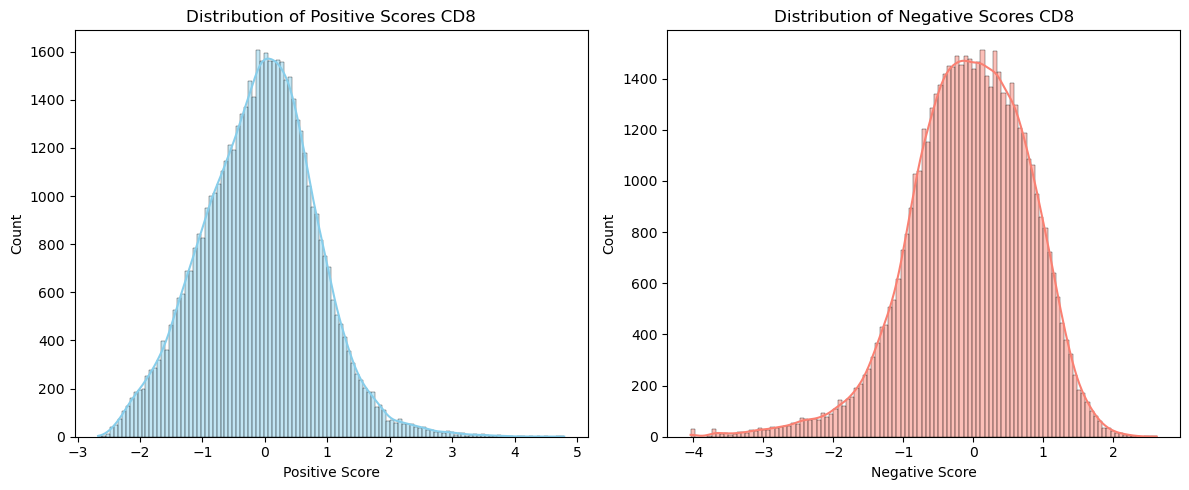

In [10]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_filtered['pos_score_CD8'], kde=True, color='skyblue')
plt.title('Distribution of Positive Scores CD8')
plt.xlabel('Positive Score')

plt.subplot(1, 2, 2)
sns.histplot(df_filtered['neg_score_CD8'], kde=True, color='salmon')
plt.title('Distribution of Negative Scores CD8')
plt.xlabel('Negative Score')

plt.tight_layout()
plt.show()

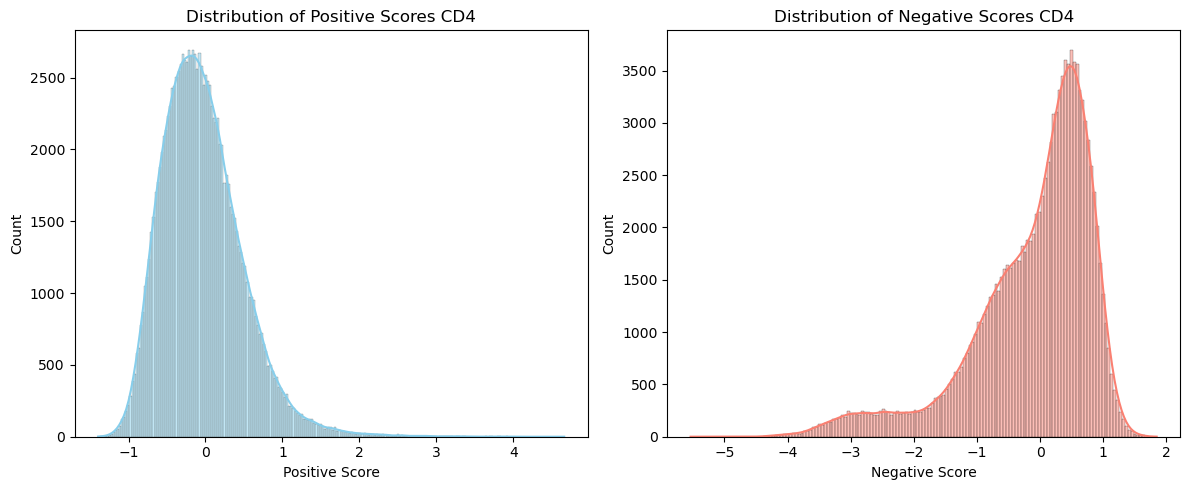

In [11]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_filtered['pos_score_CD4'], kde=True, color='skyblue')
plt.title('Distribution of Positive Scores CD4')
plt.xlabel('Positive Score')

plt.subplot(1, 2, 2)
sns.histplot(df_filtered['neg_score_CD4'], kde=True, color='salmon')
plt.title('Distribution of Negative Scores CD4')
plt.xlabel('Negative Score')

plt.tight_layout()
plt.show()

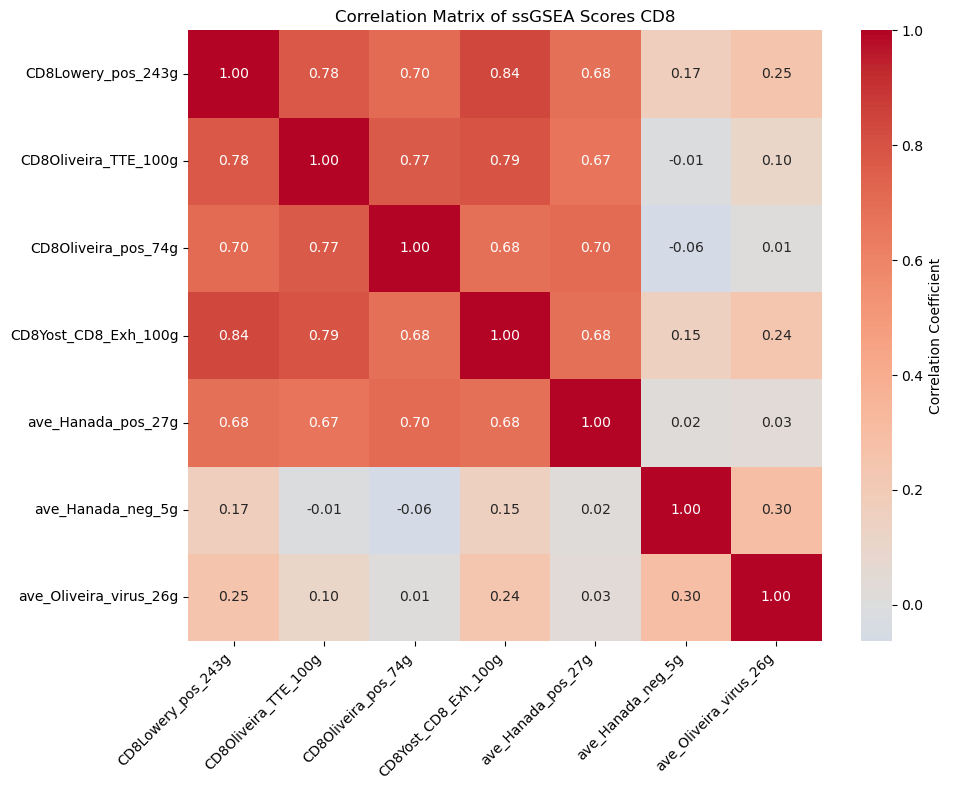

In [12]:
# Combine the lists to get all columns
all_sigs_CD8 = pos_sigs_CD8 + neg_sigs_CD8

# Calculate the correlation matrix for the specified columns in the original DataFrame
corr_matrix = df_filtered[df_filtered['predicted.celltype.l2'].isin(t_cells['CD8'])][all_sigs_CD8].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0, fmt=".2f", 
                      cbar_kws={"label": "Correlation Coefficient"})

plt.title("Correlation Matrix of ssGSEA Scores CD8")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

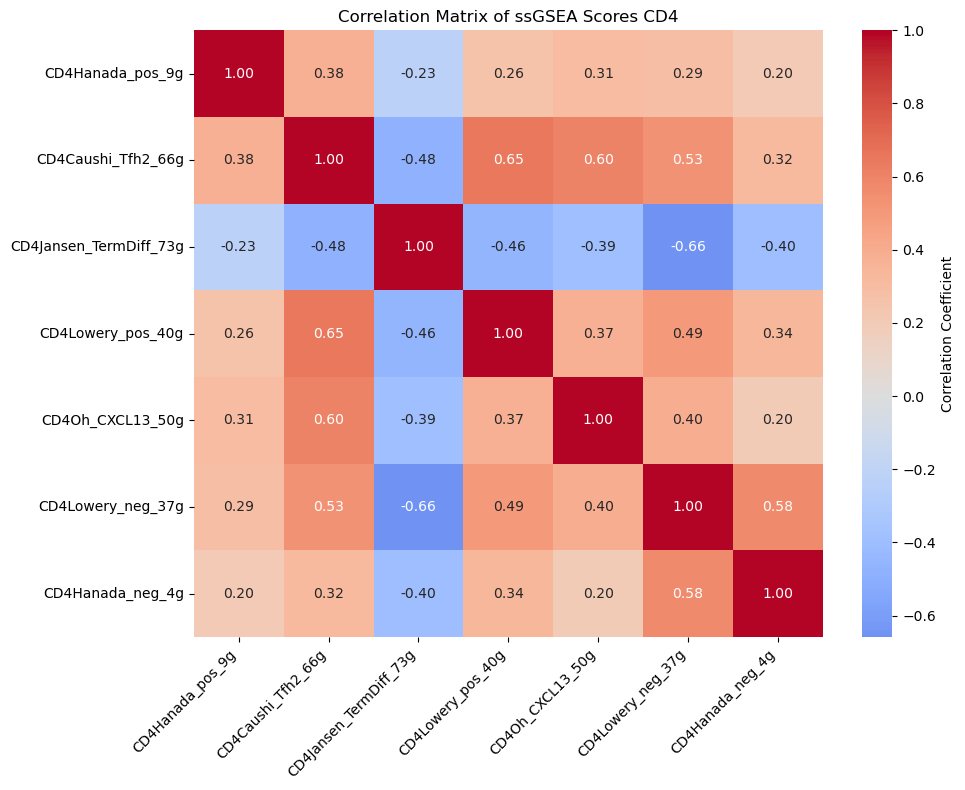

In [13]:
# Combine the lists to get all columns
all_sigs_CD4 = pos_sigs_CD4 + neg_sigs_CD4

# Calculate the correlation matrix for the specified columns in the original DataFrame
corr_matrix = df_filtered[df_filtered['predicted.celltype.l2'].isin(t_cells['CD4'])][all_sigs_CD4].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0, fmt=".2f", 
                      cbar_kws={"label": "Correlation Coefficient"})

plt.title("Correlation Matrix of ssGSEA Scores CD4")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Clustering based on signature genes

In [14]:
import pickle
with open("signatures_CD8.pkl", "rb") as f:
    sigs_CD8 = pickle.load(f)

print({k: len(v) for k, v in sigs_CD8.items()})

with open("signatures_CD4.pkl", "rb") as f:
    sigs_CD4 = pickle.load(f)

print({k: len(v) for k, v in sigs_CD4.items()})

{'Lowery_pos_243g': 243, 'Oliveira_TTE_100g': 100, 'Oliveira_pos_74g': 74, 'Yost_CD8_Exh_100g': 100, 'Hanada_pos_27g': 27, 'Lowery_neg_99g': 99, 'Oliveira_virus_26g': 26, 'Hanada_neg_5g': 5}
{'Lowery_pos_40g': 40, 'Jansen_TermDiff_73g': 73, 'Caushi_Tfh2_66g': 66, 'Oh_CXCL13_50g': 50, 'Hanada_pos_9g': 9, 'Lowery_neg_37g': 37, 'Hanada_neg_4g': 4}


In [15]:
import scanpy as sc
adata_all = sc.read_h5ad("GSE253173_single_cell_DREAM.h5ad")

In [16]:
all_genes_flat_CD8 = [item for sublist in sigs_CD8.values() for item in sublist]
all_genes_flat_CD4 = [item for sublist in sigs_CD4.values() for item in sublist]
subset_genes_CD8 = list(set(all_genes_flat_CD8))
subset_genes_CD4 = list(set(all_genes_flat_CD4))

In [17]:
matched_genes_CD8 = []
matched_genes_CD4 = []

for s1 in subset_genes_CD8:
    if s1 in list(adata_all.var['gene']):
        matched_genes_CD8.append(s1)
for s1 in subset_genes_CD4:
    if s1 in list(adata_all.var['gene']):
        matched_genes_CD4.append(s1)    
# Print match info
print(f" {len(matched_genes_CD4)}/{len(subset_genes_CD4)} CD4 genes are found.")
print(f" {len(matched_genes_CD8)}/{len(subset_genes_CD8)} CD8 genes are found.")

 226/230 CD4 genes are found.
 484/486 CD8 genes are found.


In [18]:
adata = adata_all.copy()

In [19]:
adata.obs

,nCount_RNA,nFeature_RNA,percent.mt,predicted.celltype.l2,LibraryName,PFS_6M,Timepoint
AAACCTGCAGATGGCA-1_1,6783.0,2551,3.479286,CD14 Mono,KH_1,0,0
AAACCTGGTAGCTTGT-1_1,3208.0,1605,3.335411,CD14 Mono,KH_1,0,0
AAACCTGGTTCACCTC-1_1,3085.0,1302,3.565640,CD14 Mono,KH_1,0,0
AAACGGGAGGTTACCT-1_1,1150.0,734,12.347826,CD4 TCM,KH_1,0,0
AAACGGGAGTCACGCC-1_1,4431.0,1807,1.850598,CD14 Mono,KH_1,0,0
...,...,...,...,...,...,...,...
TTTGTCACAAGTTCTG-1_100,4763.0,1903,5.269788,B naive,YY79,1,2
TTTGTCACACTTAACG-1_100,6676.0,2443,5.317555,CD14 Mono,YY79,1,2
TTTGTCACATAACCTG-1_100,4472.0,1958,5.210197,NK,YY79,1,2
TTTGTCACATAGAAAC-1_100,3542.0,1516,7.227555,CD14 Mono,YY79,1,2


In [20]:
adata

AnnData object with n_obs × n_vars = 390373 × 21906
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'predicted.celltype.l2', 'LibraryName', 'PFS_6M', 'Timepoint'
    var: 'gene'
    obsm: 'X_ref.umap'

In [21]:
adata.var.index = adata.var['gene']

/app/software/umap-learn/0.5.3-foss-2022b/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/app/software/umap-learn/0.5.3-foss-2022b/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/app/software/umap-learn/0.5.3-foss-2022b/lib/python3.10

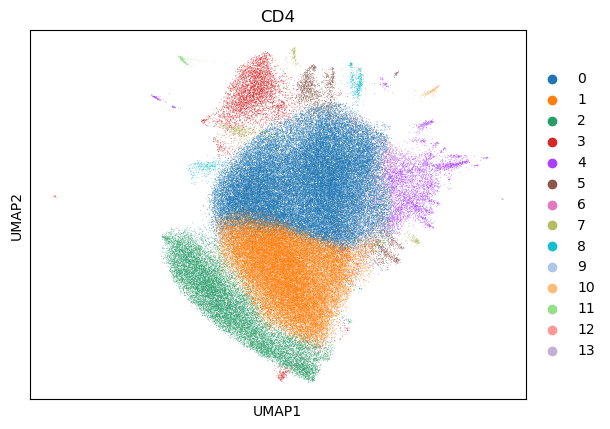

/app/software/scanpy/1.9.3-foss-2022b/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


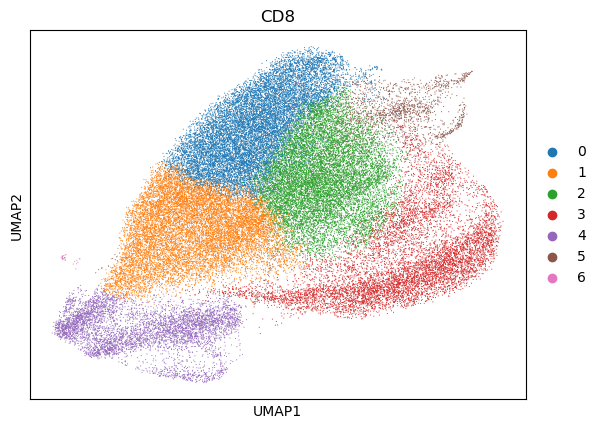

In [22]:
%matplotlib inline

def run_cluster(sub_adata, key: str):
    sc.pp.scale(sub_adata)
    sc.tl.pca(sub_adata, svd_solver="arpack")
    sc.pp.neighbors(sub_adata, n_neighbors=15, n_pcs=25)
    sc.tl.umap(sub_adata)
    sc.tl.leiden(sub_adata, resolution=0.3)
    sc.pl.umap(sub_adata, color="leiden", title=key)
    return sub_adata.obs.rename(columns={"leiden": f"cluster_{key}"})

cd4_mask = adata.obs["predicted.celltype.l2"].isin(t_cells['CD4'])
cd8_mask = adata.obs["predicted.celltype.l2"].isin(t_cells['CD8'])


leiden_cd4 = run_cluster(adata[cd4_mask, matched_genes_CD4].copy(), "CD4")
leiden_cd8 = run_cluster(adata[cd8_mask, matched_genes_CD8].copy(), "CD8")

clusters_wide = pd.concat([leiden_cd4, leiden_cd8], sort=False)


In [23]:
clusters_wide.index.name = "cell_barcode"

cluster_df = clusters_wide.reset_index()
cluster_df

,cell_barcode,nCount_RNA,nFeature_RNA,percent.mt,predicted.celltype.l2,LibraryName,PFS_6M,Timepoint,cluster_CD4,cluster_CD8
0,AAACGGGAGGTTACCT-1_1,1150.0,734,12.347826,CD4 TCM,KH_1,0,0,2,NaN
1,AAACGGGGTCCGTGAC-1_1,4552.0,1526,2.789982,CD4 TCM,KH_1,0,0,0,NaN
2,AAAGCAAAGAAGGCCT-1_1,3543.0,1246,4.318374,CD4 TCM,KH_1,0,0,1,NaN
3,AAAGCAACACGAAACG-1_1,1289.0,863,10.240497,CD4 Naive,KH_1,0,0,2,NaN
4,AAAGTAGCAATCCGAT-1_1,1765.0,873,4.475921,CD4 TCM,KH_1,0,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...
175062,TTTGGTTAGCCGTCGT-1_100,2875.0,1203,3.200000,CD8 TEM,YY79,1,2,NaN,1
175063,TTTGGTTCATCACCCT-1_100,4592.0,1965,4.137631,CD8 TEM,YY79,1,2,NaN,2
175064,TTTGGTTCATCCGGGT-1_100,4550.0,1429,4.747253,CD8 Naive,YY79,1,2,NaN,3
175065,TTTGGTTCATGCCTAA-1_100,3585.0,1887,5.216179,CD8 TEM,YY79,1,2,NaN,0


In [24]:
new_index = [bc.rsplit('-', 1)[0] for bc in cluster_df.cell_barcode	]
cluster_df.cell_barcode = new_index
new_index2 = [bc.rsplit('-', 1)[0] for bc in df_filtered.cell_id]
df_filtered['cell_barcode'] = new_index2

In [25]:
merged_df = cluster_df.merge(df_filtered[["cell_barcode","LibraryName","predicted.celltype.l2", "cancer_reactive_per_cell_CD4","cancer_reactive_per_cell_CD8"]],
                             on=["cell_barcode","LibraryName", "predicted.celltype.l2"],
                             how="right")
merged_df

,cell_barcode,nCount_RNA,nFeature_RNA,percent.mt,predicted.celltype.l2,LibraryName,PFS_6M,Timepoint,cluster_CD4,cluster_CD8,cancer_reactive_per_cell_CD4,cancer_reactive_per_cell_CD8
0,AAACCTGAGAAACCAT,2047.0,1147,7.474353,CD4 TCM,KH_44,0,2,2,NaN,True,NaN
1,AAACCTGAGAAACGAG,4234.0,1421,3.589986,CD4 TCM,YY_38,0,0,0,NaN,False,NaN
2,AAACCTGAGAAACGCC,1573.0,826,9.218055,CD4 TCM,YY76,1,0,2,NaN,False,NaN
3,AAACCTGAGAATAGGG,1238.0,508,1.696284,CD4 Naive,KH_3,0,1,1,NaN,False,NaN
4,AAACCTGAGAATCTCC,4774.0,1714,3.142019,CD4 TCM,MJ_177,0,1,0,NaN,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
175062,TTTGTCATCTTCTGGC,7339.0,2298,4.564655,CD8 Naive,YY78,0,2,NaN,3,NaN,False
175063,TTTGTCATCTTTACAC,2322.0,1246,7.795004,CD4 TCM,KH_44,0,2,2,NaN,False,NaN
175064,TTTGTCATCTTTACGT,3347.0,1783,9.291903,CD4 TCM,KH_33,1,1,2,NaN,True,NaN
175065,TTTGTCATCTTTAGGG,3032.0,1574,5.540897,CD4 Naive,KH_34,0,0,2,NaN,True,NaN


In [26]:
merged_df = cluster_df.merge(df_filtered[["cell_barcode","LibraryName","predicted.celltype.l2", "cancer_reactive_per_cell_CD4","cancer_reactive_per_cell_CD8"]],
                             on=["cell_barcode","LibraryName", "predicted.celltype.l2"],
                             how="right")
merged_df["cluster"] = merged_df.apply(
    lambda r: r["cluster_CD4"] if r["predicted.celltype.l2"] in t_cells['CD4']
              else r["cluster_CD8"],
    axis=1
)

merged_df["cancer_reactive_per_cell"] = merged_df.apply(
    lambda r: r["cancer_reactive_per_cell_CD4"] if r["predicted.celltype.l2"] in t_cells['CD4']
              else r["cancer_reactive_per_cell_CD8"],
    axis=1
)
is_cd4 = merged_df["predicted.celltype.l2"].isin(t_cells['CD4'])

merged_df["cell_type"] = np.where(is_cd4, "CD4", "CD8")

# Group by both cell_type & cluster and compute the fraction reactive
cluster_frac = (
    merged_df
    .groupby(["cell_type", "cluster"])["cancer_reactive_per_cell"]
    .mean()
    .rename("reactive_fraction")
)

# if you want to inspect it as a nice DataFrame:
cluster_frac_df = cluster_frac.reset_index()
cluster_frac_df

,cell_type,cluster,reactive_fraction
0,CD4,0,0.169845
1,CD4,1,0.189869
2,CD4,10,0.211765
3,CD4,11,0.238411
4,CD4,12,0.125000
5,CD4,13,0.294118
6,CD4,2,0.249011
7,CD4,3,0.150217
8,CD4,4,0.229004
9,CD4,5,0.298535


In [27]:
#  threshold and collect all (cell_type, cluster) pairs above it
threshold = 0.4
reactive_pairs = set(
    cluster_frac[cluster_frac > threshold].index
)

reactive_pairs


{('CD8', '0'), ('CD8', '5')}

In [28]:
# map back to every cell
merged_df["cancer_reactive_by_cluster"] = merged_df.apply(
    lambda r: True
              if (r["cell_type"], r["cluster"]) in reactive_pairs
              else False,
    axis=1
)

final = merged_df[[
    "cell_barcode", "cell_type", "cluster", 
    "cancer_reactive_per_cell", "cancer_reactive_by_cluster", "LibraryName"
]]
final

,cell_barcode,cell_type,cluster,cancer_reactive_per_cell,cancer_reactive_by_cluster,LibraryName
0,AAACCTGAGAAACCAT,CD4,2,True,False,KH_44
1,AAACCTGAGAAACGAG,CD4,0,False,False,YY_38
2,AAACCTGAGAAACGCC,CD4,2,False,False,YY76
3,AAACCTGAGAATAGGG,CD4,1,False,False,KH_3
4,AAACCTGAGAATCTCC,CD4,0,False,False,MJ_177
...,...,...,...,...,...,...
175062,TTTGTCATCTTCTGGC,CD8,3,False,False,YY78
175063,TTTGTCATCTTTACAC,CD4,2,False,False,KH_44
175064,TTTGTCATCTTTACGT,CD4,2,True,False,KH_33
175065,TTTGTCATCTTTAGGG,CD4,2,True,False,KH_34


In [29]:
df_combined

nCount_RNA  nFeature_RNA  \
cell_id                 TCR_entry_number                             
AAACCTGAGAAACCAT-KH_44  NaN                   2047.0          1147   
AAACCTGAGAAACGAG-YY_38  1.0                   4234.0          1421   
AAACCTGAGAAACGCC-YY76   NaN                   1573.0           826   
AAACCTGAGAATAGGG-KH_3   NaN                   1238.0           508   
AAACCTGAGAATCTCC-MJ_177 1.0                   4774.0          1714   
...                                              ...           ...   
TTTGTCATCTTTACGT-KH_33  2.0                   3347.0          1783   
TTTGTCATCTTTAGGG-KH_34  1.0                   3032.0          1574   
                        2.0                   3032.0          1574   
TTTGTCATCTTTAGTC-MJ_191 1.0                   4030.0          2278   
                        2.0                   4030.0          2278   

                                          percent.mt predicted.celltype.l2  \
cell_id                 TCR_entry_number                                     
AAACCTGAGAAACCAT-KH_44  NaN                 7.474353               CD4 TCM   
AAACCTGAGAAACGAG-YY_38  1.0                 3.589986               CD4 TCM   
AAACCTGAGAAACGCC-YY76   NaN                 9.218055               CD4 TCM   
AAACCTGAGAATAGGG-KH_3   NaN                 1.696284             CD4 Naive   
AAACCTGAGAATCTCC-MJ_177 1.0                 3.142019               CD4 TCM   
...                                              ...                   ...   
TTTGTCATCTTTACGT-KH_33  2.0                 9.291903               CD4 TCM   
TTTGTCATCTTTAGGG-KH_34  1.0                 5.540897             CD4 Naive   
                        2.0                 5.540897             CD4 Naive   
TTTGTCATCTTTAGTC-MJ_191 1.0                 3.598015               CD8 TEM   
                        2.0                 3.598015               CD8 TEM   

                                         LibraryName  PFS_6M  Timepoint  \
cell_id                 TCR_entry_number                                  
AAACCTGAGAAACCAT-KH_44  NaN                    KH_44       0          2   
AAACCTGAGAAACGAG-YY_38  1.0                    YY_38       0          0   
AAACCTGAGAAACGCC-YY76   NaN                     YY76       1          0   
AAACCTGAGAATAGGG-KH_3   NaN                     KH_3       0          1   
AAACCTGAGAATCTCC-MJ_177 1.0                   MJ_177       0          1   
...                                              ...     ...        ...   
TTTGTCATCTTTACGT-KH_33  2.0                    KH_33       1          1   
TTTGTCATCTTTAGGG-KH_34  1.0                    KH_34       0          0   
                        2.0                    KH_34       0          0   
TTTGTCATCTTTAGTC-MJ_191 1.0                   MJ_191       1          0   
                        2.0                   MJ_191       1          0   

                                          CD8Lowery_neg_99g  \
cell_id                 TCR_entry_number                      
AAACCTGAGAAACCAT-KH_44  NaN                        0.502732   
AAACCTGAGAAACGAG-YY_38  1.0                        0.515579   
AAACCTGAGAAACGCC-YY76   NaN                        0.339354   
AAACCTGAGAATAGGG-KH_3   NaN                        0.422907   
AAACCTGAGAATCTCC-MJ_177 1.0                        0.552586   
...                                                     ...   
TTTGTCATCTTTACGT-KH_33  2.0                        0.508400   
TTTGTCATCTTTAGGG-KH_34  1.0                        0.533437   
                        2.0                        0.533437   
TTTGTCATCTTTAGTC-MJ_191 1.0                        0.457125   
                        2.0                        0.457125   

                                          CD8Lowery_pos_243g  \
cell_id                 TCR_entry_number                       
AAACCTGAGAAACCAT-KH_44  NaN                        -0.115765   
AAACCTGAGAAACGAG-YY_38  1.0                        -0.006732   
AAACCTGAGAAACGCC-YY76   NaN                        -0.090204   


In [30]:
new_index3 = [bc.rsplit('-', 1)[0] for bc in df_combined.index.get_level_values('cell_id')]
df_combined['cell_barcode'] = new_index3
out = df_combined.merge(final, on=['cell_barcode','LibraryName'],how="left")
out.index = df_combined.index
out

nCount_RNA  nFeature_RNA  \
cell_id                 TCR_entry_number                             
AAACCTGAGAAACCAT-KH_44  NaN                   2047.0          1147   
AAACCTGAGAAACGAG-YY_38  1.0                   4234.0          1421   
AAACCTGAGAAACGCC-YY76   NaN                   1573.0           826   
AAACCTGAGAATAGGG-KH_3   NaN                   1238.0           508   
AAACCTGAGAATCTCC-MJ_177 1.0                   4774.0          1714   
...                                              ...           ...   
TTTGTCATCTTTACGT-KH_33  2.0                   3347.0          1783   
TTTGTCATCTTTAGGG-KH_34  1.0                   3032.0          1574   
                        2.0                   3032.0          1574   
TTTGTCATCTTTAGTC-MJ_191 1.0                   4030.0          2278   
                        2.0                   4030.0          2278   

                                          percent.mt predicted.celltype.l2  \
cell_id                 TCR_entry_number                                     
AAACCTGAGAAACCAT-KH_44  NaN                 7.474353               CD4 TCM   
AAACCTGAGAAACGAG-YY_38  1.0                 3.589986               CD4 TCM   
AAACCTGAGAAACGCC-YY76   NaN                 9.218055               CD4 TCM   
AAACCTGAGAATAGGG-KH_3   NaN                 1.696284             CD4 Naive   
AAACCTGAGAATCTCC-MJ_177 1.0                 3.142019               CD4 TCM   
...                                              ...                   ...   
TTTGTCATCTTTACGT-KH_33  2.0                 9.291903               CD4 TCM   
TTTGTCATCTTTAGGG-KH_34  1.0                 5.540897             CD4 Naive   
                        2.0                 5.540897             CD4 Naive   
TTTGTCATCTTTAGTC-MJ_191 1.0                 3.598015               CD8 TEM   
                        2.0                 3.598015               CD8 TEM   

                                         LibraryName  PFS_6M  Timepoint  \
cell_id                 TCR_entry_number                                  
AAACCTGAGAAACCAT-KH_44  NaN                    KH_44       0          2   
AAACCTGAGAAACGAG-YY_38  1.0                    YY_38       0          0   
AAACCTGAGAAACGCC-YY76   NaN                     YY76       1          0   
AAACCTGAGAATAGGG-KH_3   NaN                     KH_3       0          1   
AAACCTGAGAATCTCC-MJ_177 1.0                   MJ_177       0          1   
...                                              ...     ...        ...   
TTTGTCATCTTTACGT-KH_33  2.0                    KH_33       1          1   
TTTGTCATCTTTAGGG-KH_34  1.0                    KH_34       0          0   
                        2.0                    KH_34       0          0   
TTTGTCATCTTTAGTC-MJ_191 1.0                   MJ_191       1          0   
                        2.0                   MJ_191       1          0   

                                          CD8Lowery_neg_99g  \
cell_id                 TCR_entry_number                      
AAACCTGAGAAACCAT-KH_44  NaN                        0.502732   
AAACCTGAGAAACGAG-YY_38  1.0                        0.515579   
AAACCTGAGAAACGCC-YY76   NaN                        0.339354   
AAACCTGAGAATAGGG-KH_3   NaN                        0.422907   
AAACCTGAGAATCTCC-MJ_177 1.0                        0.552586   
...                                                     ...   
TTTGTCATCTTTACGT-KH_33  2.0                        0.508400   
TTTGTCATCTTTAGGG-KH_34  1.0                        0.533437   
                        2.0                        0.533437   
TTTGTCATCTTTAGTC-MJ_191 1.0                        0.457125   
                        2.0                        0.457125   

                                          CD8Lowery_pos_243g  \
cell_id                 TCR_entry_number                       
AAACCTGAGAAACCAT-KH_44  NaN                        -0.115765   
AAACCTGAGAAACGAG-YY_38  1.0                        -0.006732   
AAACCTGAGAAACGCC-YY76   NaN                        -0.090204   


In [34]:
#out.to_csv("cell_meta_data_with_cancer_reactive_labels.csv", index=True)

In [32]:
# import os
# import pandas as pd

# folder_path = './GSE252432_RAW'
# dataframes = {}

# # Loop through all .csv.gz files in the folder
# for file_name in os.listdir(folder_path):
#     if file_name.endswith('.csv.gz'):
#         full_path = os.path.join(folder_path, file_name)
#         df = pd.read_csv(full_path, compression='gzip')
#         dataframes[file_name] = df  # Store in dict with filename as key

# # Example: show one of them
# dataframes['GSM8001307_KH_48_TCR.csv.gz'].columns

In [33]:
# dataframes['GSM8001307_KH_48_TCR.csv.gz'].head()